In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re

### Reading the data

In [2]:
df = pd.read_excel("IClatest.xlsx")
df.head()

,companyname
0,Syed Mateen Uddin
1,Pawar Bharathi
2,Mekala Sneha
3,Gulam Rabbani
4,Black Gold


### No. of records in each column

In [3]:
df.count()

companyname    78538
dtype: int64

### Dtype(data-type) of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78538 entries, 0 to 78537
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   companyname  78538 non-null  object
dtypes: object(1)
memory usage: 613.7+ KB


### Need to standardise data to the obvious(str type)

In [5]:
df['Company Names'] = df['companyname'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78538 entries, 0 to 78537
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   companyname    78538 non-null  object
 1   Company Names  78538 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


### UDF that counts digits in the string 

In [7]:
def countDigits(company_names):
    count = 0
    for x in company_names:
        if x.isdigit():
            count = count + 1
    return count

### Applying the UDF as per value in "Company Names"
- Making a new feature as "Digits present" alongside the previous
- Count of digits was found to be relatively large for wrong values(Can be proved below)

In [8]:
df["Digits present"] = df["Company Names"].map(countDigits)
# df['new_col'] = df["Company Names"].apply(count_digits_in_text)

### No. of records in each column

In [9]:
df.count()

companyname       78538
Company Names     78538
Digits present    78538
dtype: int64

### Sorting by "Digits Present" in descending order
- This sorting clears fact that - "Count of digits was found to be relatively large for wrong values"

In [10]:
df.sort_values(by=["Digits present"],ascending=False).head()

,companyname,Company Names,Digits present
43381,Zayam Collection 1-10-4/C Shah Saheb Gutta Mah...,Zayam Collection 1-10-4/C Shah Saheb Gutta Mah...,10
9216,Sajid9912967380@Gmail.Com,Sajid9912967380@Gmail.Com,10
8422,36bntpb6679k1z6,36bntpb6679k1z6,8
17644,N0387034,N0387034,7
77824,Crime100 Broad Cast T V News India 24x7,Crime100 Broad Cast T V News India 24x7,6


### Calculating the median of "Digits Present"

In [11]:
df["Digits present"].describe()

count    78538.000000
mean         0.006965
std          0.136307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: Digits present, dtype: float64

In [12]:
df["Digits present"].median()

0.0

#### Above value dictates, most of the values in Company Names have no numbers in their names

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78538 entries, 0 to 78537
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   companyname     78538 non-null  object
 1   Company Names   78538 non-null  object
 2   Digits present  78538 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


### Distribution of values in "Digits present" column

In [14]:
pd.DataFrame(df["Digits present"].value_counts())

,Digits present
0,78211
1,219
2,52
3,28
4,18
6,3
5,3
10,2
8,1
7,1


### % of names that have no numbers in between them

In [15]:
print("Percent of company names/ individual names having no number in between: " 
      + "{:.2f}".format((78211/78538)*100) + "%") #the figure of 139949 has been taken from the Distribution above

Percent of company names/ individual names having no number in between: 99.58%


### Plots that show - "Most of the company names have 0-2 number of digits in their name"

In [16]:
df["Digits present"].value_counts().sort_index(ascending=True)

0     78211
1       219
2        52
3        28
4        18
5         3
6         3
7         1
8         1
10        2
Name: Digits present, dtype: int64

<AxesSubplot: title={'center': 'No. of digits VS No. of records'}, xlabel='number of digits', ylabel='number of records'>

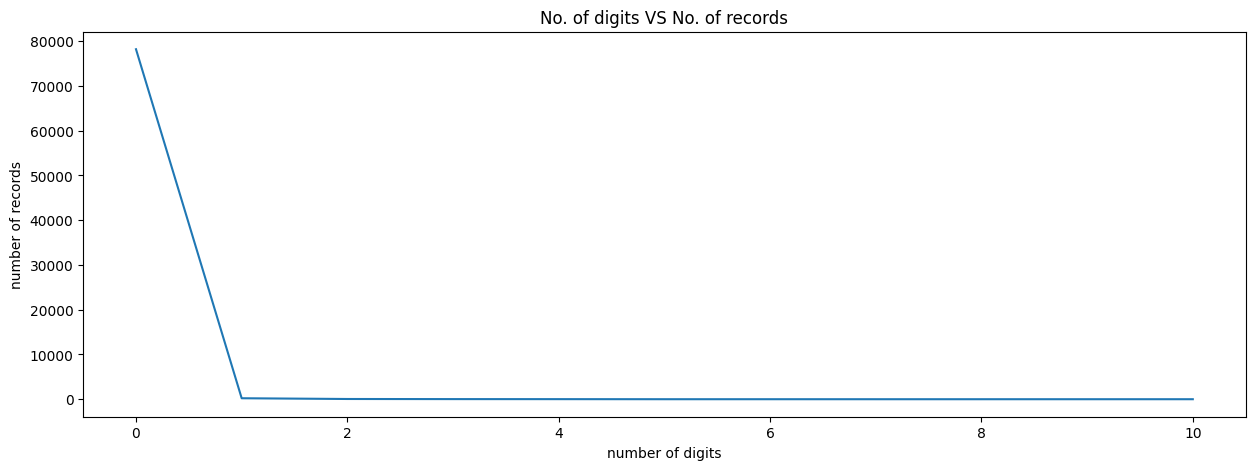

In [17]:
plt.figure(figsize=[15,5])
y=df["Digits present"].value_counts().sort_index(ascending=True).values.tolist()
x=df["Digits present"].value_counts().sort_index(ascending=True).index.tolist()
plt.xlabel("number of digits")
plt.ylabel("number of records")
plt.title("No. of digits VS No. of records")
sns.lineplot(x=x,y=y)

<AxesSubplot: >

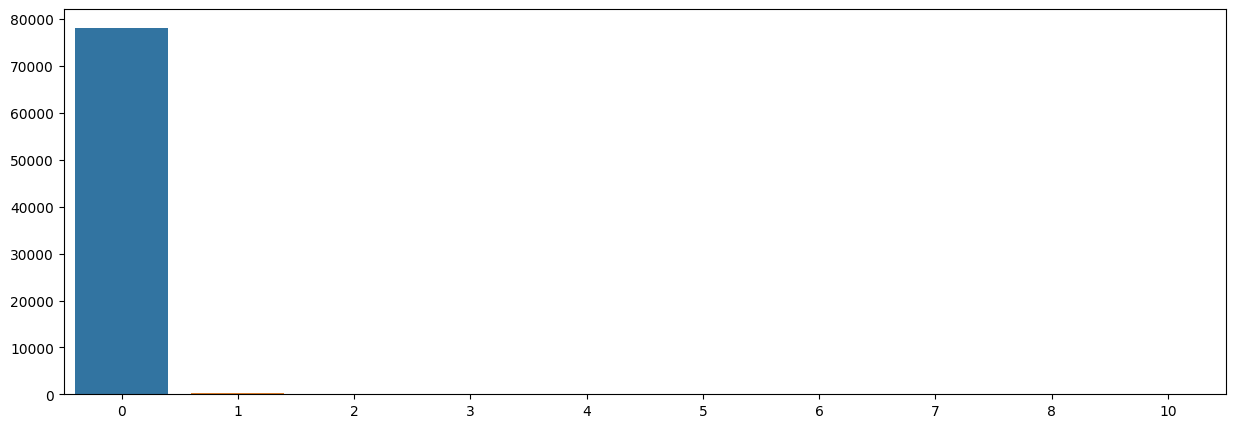

In [18]:
plt.figure(figsize=[15,5])
sns.barplot(x=x,y=y)

### No. of records having    "null/nan/NaN/empty"    values

In [19]:
df.loc[(df['Company Names'].isna() == True) | (df['Company Names'].isin(['N/a','NaN','NA','N/A','n/A','nan',""," "]))]

,companyname,Company Names,Digits present
63336,N/a,N/a,0


### Checking for "@" with regexp

In [20]:
regex = r'@'   #Check if it contains any @
def checkIfEmail(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [21]:
df["Is Email"] = df["Company Names"].map(checkIfEmail)

In [22]:
df[df["Is Email"] == "yes"]

,companyname,Company Names,Digits present,Is Email
1010,Moinkhaja009@Gmail.Com,Moinkhaja009@Gmail.Com,3,yes
9216,Sajid9912967380@Gmail.Com,Sajid9912967380@Gmail.Com,10,yes
10734,Srinivasbanala1980@Gmail.Com,Srinivasbanala1980@Gmail.Com,4,yes
11648,Syed123@Gma.Com,Syed123@Gma.Com,3,yes
25310,Am@ Fashion Mine,Am@ Fashion Mine,0,yes
38767,M/S Venkataramanarsamma Poulrty Faroum @Feed,M/S Venkataramanarsamma Poulrty Faroum @Feed,0,yes
46878,Telabixapathi9000@Gmail.Com,Telabixapathi9000@Gmail.Com,4,yes
51875,Seetha Rama Infra @ Mines,Seetha Rama Infra @ Mines,0,yes
57995,Naresh95425@Gmail.Com,Naresh95425@Gmail.Com,5,yes
58788,Vamshimandi@Gmail.Com,Vamshimandi@Gmail.Com,0,yes


 - We have confirmed there are emails in the above dataset.
 - Emails are not a value for "Company Names" column hence they should be discarded.
 - <font color="red"><b>CAUTION:</font> we see that the values Seetha Rama Infra @ Mines, Am@ Fashion Mine are good values.
 - <font color="green"><b>SOLUTION:</font> we will construct a more strict regexp for selecting emails

### Strictly checking for emails with regexp

In [23]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'   #Copied regex pattern email from gitHub
def checkIfEmail(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [24]:
df["Is Email"] = df["Company Names"].map(checkIfEmail)

In [25]:
df[df["Is Email"] == "yes"]

,companyname,Company Names,Digits present,Is Email
1010,Moinkhaja009@Gmail.Com,Moinkhaja009@Gmail.Com,3,yes
9216,Sajid9912967380@Gmail.Com,Sajid9912967380@Gmail.Com,10,yes
10734,Srinivasbanala1980@Gmail.Com,Srinivasbanala1980@Gmail.Com,4,yes
11648,Syed123@Gma.Com,Syed123@Gma.Com,3,yes
46878,Telabixapathi9000@Gmail.Com,Telabixapathi9000@Gmail.Com,4,yes
57995,Naresh95425@Gmail.Com,Naresh95425@Gmail.Com,5,yes
58788,Vamshimandi@Gmail.Com,Vamshimandi@Gmail.Com,0,yes
59137,Naresh123@Gmail.Com,Naresh123@Gmail.Com,3,yes
59144,Madhavibandaru9666@Gmail.Com,Madhavibandaru9666@Gmail.Com,4,yes
59933,Kavalianjappa@Gmail.Com,Kavalianjappa@Gmail.Com,0,yes


- As expected there are many emails in the company names column

### Checking for "#" with regexp

In [26]:
regex = r'#'   #Check if it contains any #
def checkIfPound(email):
    if(re.search(regex,email)):
        return("yes")   
    else:
        return("no")

In [27]:
df["Is Pound-#"] = df["Company Names"].map(checkIfPound)

In [28]:
df[df["Is Pound-#"] == "yes"]

,companyname,Company Names,Digits present,Is Email,Is Pound-#


- We found no result containing the #(pound) symbol.
- We do not have to format this value by removing pound symbol.

### UDF that counts words in the string

In [29]:
def countWords(company_names):
    count = 0
    for x in company_names:
        if x.isspace():
            count = count + 1
    return count+1

### Applying the UDF as per value in "Company Names"

In [30]:
df["Words present"] = df["Company Names"].map(countWords)
# df['new_col'] = df["Company Names"].apply(count_digits_in_text)

### Sorting by "Words present" in descending order
- This sorting clears fact that - "Count of digits was found to be relatively large for wrong values"

In [31]:
df.sort_values(by=["Words present"],ascending=False).head()

,companyname,Company Names,Digits present,Is Email,Is Pound-#,Words present
24893,Sri Sai Garments Petticotes Lining Cloths Fall...,Sri Sai Garments Petticotes Lining Cloths Fall...,0,no,no,13
66914,M/S The Ntpc Landoustees Harijana And Balaheen...,M/S The Ntpc Landoustees Harijana And Balaheen...,0,no,no,13
51126,Laxmi Prasana Aqua Industries Telagana Club So...,Laxmi Prasana Aqua Industries Telagana Club So...,0,no,no,12
6570,Indoor Mahila Pattana Mutually Aided Cooperati...,Indoor Mahila Pattana Mutually Aided Cooperati...,0,no,no,12
20066,M/S Shiridi Sai Women Thrift And Credit Mutual...,M/S Shiridi Sai Women Thrift And Credit Mutual...,0,no,no,12


In [32]:
df["Words present"].describe()

count    78538.000000
mean         2.689717
std          1.181266
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: Words present, dtype: float64

<AxesSubplot: ylabel='Words present'>

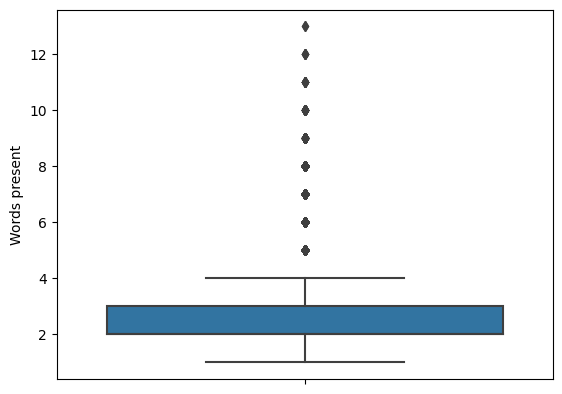

In [33]:
sns.boxplot(y=df["Words present"])

In [34]:
df["Words present"].median()

2.0

In [35]:
df[df["Words present"] <= 7].describe()

,Digits present,Words present
count,78157.000000,78157.000000
mean,0.006551,2.660913
std,0.127707,1.107655
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,10.000000,7.000000


### UDF that counts chars in the string

In [36]:
def countChars(company_names):
    lenOfStr = len(company_names)
    return lenOfStr

### Applying the UDF as per value in "Company Names"

In [37]:
df["Chars Present"] = df["Company Names"].map(countChars)

<AxesSubplot: >

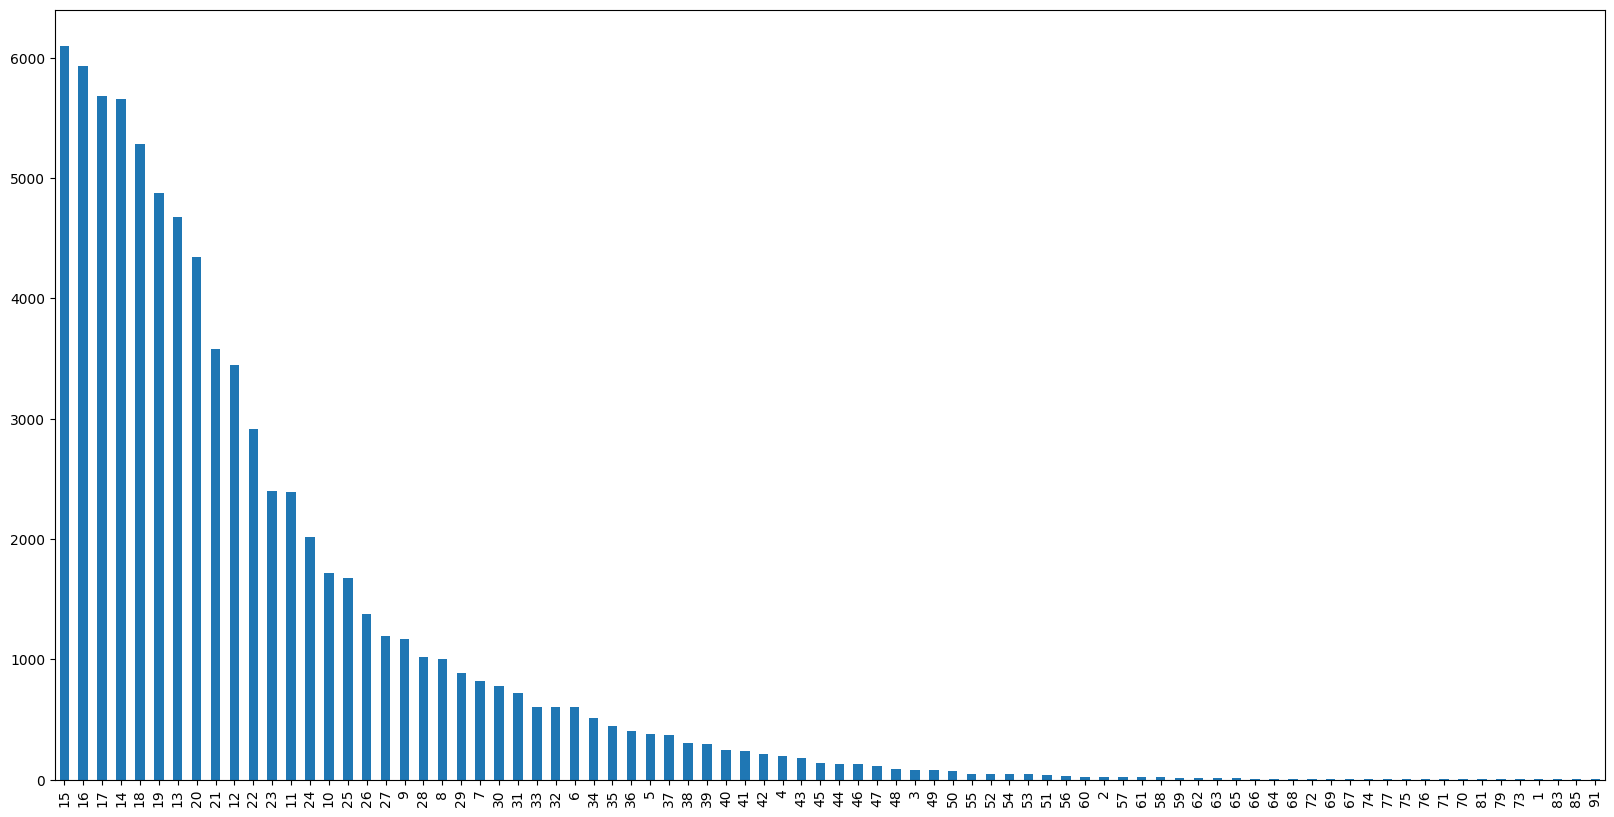

In [38]:
plt.figure(figsize=(20,10))
df["Chars Present"].value_counts().plot.bar()

In [39]:
df["Chars Present"].value_counts().describe()

count      82.000000
mean      957.780488
std      1648.724475
min         1.000000
25%        10.250000
50%       133.000000
75%       975.500000
max      6097.000000
Name: Chars Present, dtype: float64

### Checking for organisations with following keywords
- limited
- ltd
- private
- pvt
- enterprise
- m/s
- business
- organi
- servi
- trade

In [40]:
regex = r'limited|ltd|private|pvt|enterprise|m/s|business|organi|servi|trader'
def checkIfOrganisation(pieceintext):
    if(re.search(regex,pieceintext.lower()) or countDigits(pieceintext)>0):  #converting to lower case to include multiple cases
        return("yes")   
    else:
        return("no")

In [41]:
df["Contains enterprise"] = df["Company Names"].map(checkIfOrganisation)

## Starting Drop ----------------

### Removing records with count of chars less than 5

In [42]:
df2 = df.drop(index=df[df["Chars Present"] < 5].index)

### Removing records with count of words more than 7

In [43]:
df2 = df.drop(index=df[df["Words present"] >= 7].index)

### Removing null values

In [44]:
df2 = df2.drop(index=df2.loc[(df2['Company Names'].isna() == True) | (df2['Company Names'].isin(['N/a','NaN','NA','N/A','n/A','nan',""," "]))].index)

### Removing records containing email

In [45]:
df2 = df2.drop(index=df2[df2["Is Email"] == "yes"].index)

### Removing records with count of digits more than 4

In [46]:
df2 = df2.drop(index=df2[df2["Digits present"] > 4].index)

### Saving organisations in a seperate file without index

In [47]:
df2['Company Names'][df2["Contains enterprise"] == "yes"].to_excel("organisation_names.xlsx",index=False)

### Removing above Company names from original DF

In [48]:
df2 = df2.drop(index=df2[df2["Contains enterprise"] == "yes"].index)

### Comparison of both data frames

In [49]:
df.count()

companyname            78538
Company Names          78538
Digits present         78538
Is Email               78538
Is Pound-#             78538
Words present          78538
Chars Present          78538
Contains enterprise    78538
dtype: int64

In [50]:
df2.count()

companyname            65311
Company Names          65311
Digits present         65311
Is Email               65311
Is Pound-#             65311
Words present          65311
Chars Present          65311
Contains enterprise    65311
dtype: int64

In [51]:
df2['Company Names'].to_excel("rest_names.xlsx",index=False)